In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

In [2]:
train_data = pd.read_csv("titanic/train.csv")
test_data = pd.read_csv("titanic/test.csv")

## About Data

In [3]:
print("train data shape : ", train_data.shape)
print("test data shape : ", test_data.shape)
train_data.head()

train data shape :  (891, 12)
test data shape :  (418, 11)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [6]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### Fields Description:

Survived -> 1:Yes, 0:No      
Pclass(Passenger Class) -> 1:1st class, 2:2nd class, 3:3rd class     
SibSp(Siblings/Spouse no) -> in range of 0-5    
Parch (Parents/Children no) -> in range of 0-6    
Ticket (ticket no)
Cabin(Cabin no)      
Embarked(Port of Embarkation) -> C:Cherbourg, Q:Queenstown, S:Southampton      

### Train data missing values : 
Age : 177      
Cabin : 687      
Embarked : 2    


### Test data missing values : 
Age : 86     
Cabin : 327     
Fare : 1     


## Data Exploration and Visualization

### Bar Chart for Categorical Features
* Sex      
* Pclass        
* SibSp     
* Parch     
* Embarked      
* Cabin      



In [8]:
def bar_chart(feature):
    survived = train_data[train_data['Survived']==1][feature].value_counts()
    dead = train_data[train_data['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))


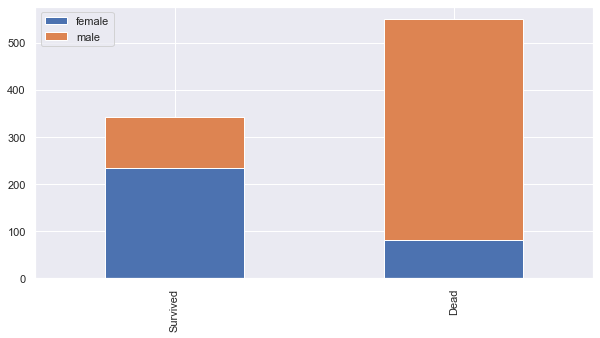

In [9]:
bar_chart('Sex')

It shows that females are more likely to survive than males

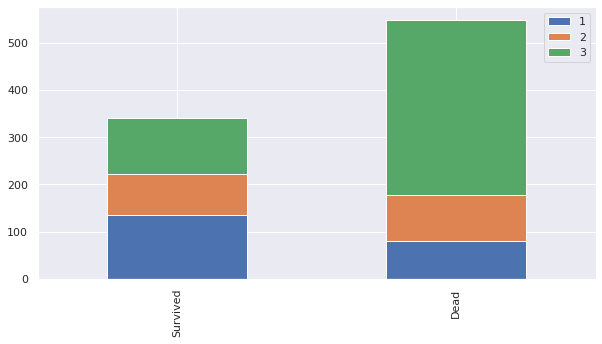

In [301]:
bar_chart('Pclass')

Confirms that first class passengers are more likely to survive

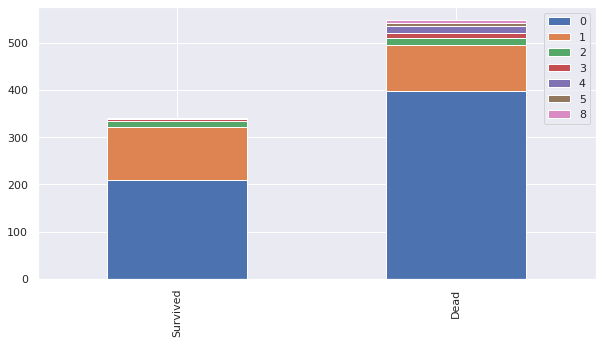

In [302]:
bar_chart('SibSp')

Shows that a person with no sibling/ spouse is more likely to survive

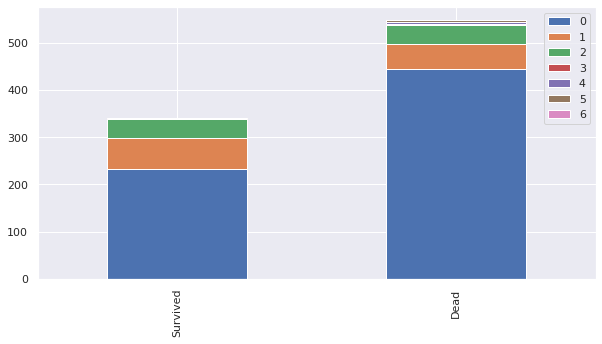

In [303]:
bar_chart('Parch')

Similar observation as that of SibSp. People having no parent or child is more likely to survive.

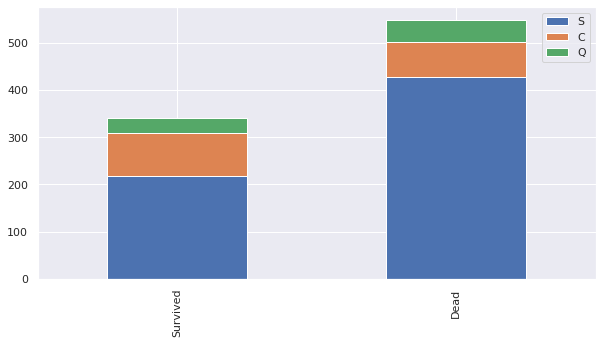

In [304]:
bar_chart('Embarked')

People embarked from S is more likely to survive, followed by C.

## Feature Engineering

### 1. Name

In [10]:
# Combining train and test data to do feature engineering

train_test = [train_data, test_data]

for data in train_test:
    data['Title'] = data['Name'].str.split(', ').str[1].str.split('.').str[0]

In [11]:
train_data['Title'].value_counts()

Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Col               2
Major             2
Mlle              2
Ms                1
Don               1
Capt              1
the Countess      1
Jonkheer          1
Mme               1
Lady              1
Sir               1
Name: Title, dtype: int64

In [370]:
# We mainly want the first three titles for our analysis as they are in majority

for dataset in train_test:
    top_3 = [x for x in dataset.Title.value_counts().sort_values(ascending=False).head(3).index]
    for label in top_3:
        dataset[label] = np.where(dataset['Title']==label,1,0)

In [371]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Mr,Miss,Mrs
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,0,0,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,1,0,0


In [372]:
# Function to delete unnecessary feature from dataset

def drop_columns(df, col):
    df.drop(col, axis=1, inplace=True)

In [373]:
for dataset in train_test:
    drop_columns(dataset, 'Name')
    drop_columns(dataset, 'Title')

In [311]:
train_data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Miss,Mrs
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,0,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,0,0,1
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,1,0
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,1,0,0


### 2. Sex

In [374]:
#Converting and concatenating sex to binary using one hot encoding

train_data = pd.concat([train_data, pd.get_dummies(train_data['Sex'], prefix='gender')],axis=1)
test_data = pd.concat([test_data, pd.get_dummies(test_data['Sex'], prefix='gender')],axis=1)


In [375]:
train_test = [train_data, test_data]
for dataset in train_test:
    drop_columns(dataset, 'Sex')
    drop_columns(dataset, 'gender_male')

In [376]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Mr,Miss,Mrs,gender_female
0,892,3,34.5,0,0,330911,7.8292,NaN,Q,1,0,0,0
1,893,3,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1
2,894,2,62.0,0,0,240276,9.6875,NaN,Q,1,0,0,0
3,895,3,27.0,0,0,315154,8.6625,NaN,S,1,0,0,0
4,896,3,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1


### 3. Age

In [377]:
# Replacing missing values with the median age grouped by title : 177, 86

train_data['Age'].fillna(train_data.groupby("Mr")["Age"].transform("median"), inplace=True)
train_data['Age'].fillna(train_data.groupby("Mrs")["Age"].transform("median"), inplace=True)
train_data['Age'].fillna(train_data.groupby("Miss")["Age"].transform("median"), inplace=True)

test_data['Age'].fillna(test_data.groupby("Mr")["Age"].transform("median"), inplace=True)
test_data['Age'].fillna(test_data.groupby("Mrs")["Age"].transform("median"), inplace=True)
test_data['Age'].fillna(test_data.groupby("Miss")["Age"].transform("median"), inplace=True)


### 4. Embarked

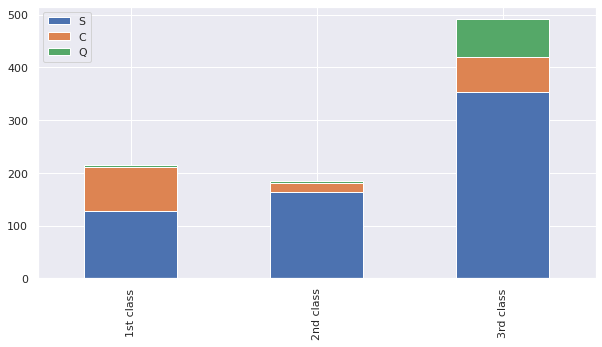

In [378]:
Pclass1 = train_data[train_data['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))


In [379]:
# Based on above observation , we can conveniently replace the missing values of embarked with S.

train_data['Embarked'] = train_data['Embarked'].fillna('S')

In [380]:
#Converting and concatenating embarked to binary using one hot encoding

train_data = pd.concat([train_data, pd.get_dummies(train_data['Embarked'], prefix='em')],axis=1)
test_data = pd.concat([test_data, pd.get_dummies(test_data['Embarked'], prefix='em')],axis=1)

drop_columns(train_data, 'em_Q')
drop_columns(test_data, 'em_Q')
drop_columns(train_data, 'Embarked')
drop_columns(test_data, 'Embarked')

### 5. Fare

In [319]:
test_data.head()

,PassengerId,Pclass,Age,SibSp,Parch,Ticket,Fare,Cabin,Mr,Miss,Mrs,gender_female,em_C,em_S
0,892,3,34.5,0,0,330911,7.8292,NaN,1,0,0,0,0,0
1,893,3,47.0,1,0,363272,7.0000,NaN,0,0,1,1,0,1
2,894,2,62.0,0,0,240276,9.6875,NaN,1,0,0,0,0,0
3,895,3,27.0,0,0,315154,8.6625,NaN,1,0,0,0,0,1
4,896,3,22.0,1,1,3101298,12.2875,NaN,0,0,1,1,0,1


In [381]:
# replacing missing Fare with median fare for each Pclass
test_data["Fare"].fillna(test_data.groupby("Pclass")["Fare"].transform("median"), inplace=True)

### 6. Cabin

In [382]:
train_data.Cabin.value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
D              3
F33            3
              ..
D9             1
C47            1
A31            1
D28            1
C106           1
Name: Cabin, Length: 147, dtype: int64

In [383]:
#Getting the first alphabet of each cabin
train_test = [train_data, test_data]
for dataset in train_test:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

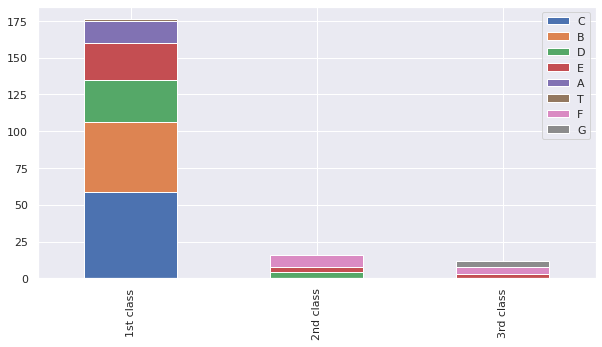

In [384]:
Pclass1 = train_data[train_data['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train_data[train_data['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train_data[train_data['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [385]:
train_data['Cabin'].value_counts()

C    59
B    47
D    33
E    32
A    15
F    13
G     4
T     1
Name: Cabin, dtype: int64

In [386]:
#Dropping cabin. Need to decide how to replace NaN values

drop_columns(train_data, 'Cabin')
drop_columns(test_data, 'Cabin')

### 7. Pclass

In [387]:
#Converting and concatenating Pclass to binary using one hot encoding

train_data = pd.concat([train_data, pd.get_dummies(train_data['Pclass'], prefix='class')],axis=1)
test_data = pd.concat([test_data, pd.get_dummies(test_data['Pclass'], prefix='class')],axis=1)

In [388]:
drop_columns(train_data, 'Pclass')
drop_columns(test_data, 'Pclass')

In [389]:
train_data.head()

,PassengerId,Survived,Age,SibSp,Parch,Ticket,Fare,Mr,Miss,Mrs,gender_female,em_C,em_S,class_1,class_2,class_3
0,1,0,22.0,1,0,A/5 21171,7.2500,1,0,0,0,0,1,0,0,1
1,2,1,38.0,1,0,PC 17599,71.2833,0,0,1,1,1,0,1,0,0
2,3,1,26.0,0,0,STON/O2. 3101282,7.9250,0,1,0,1,0,1,0,0,1
3,4,1,35.0,1,0,113803,53.1000,0,0,1,1,0,1,1,0,0
4,5,0,35.0,0,0,373450,8.0500,1,0,0,0,0,1,0,0,1


### 8. Family size

In [390]:
#Adding all the parents, children, spouse and siblings to count the no of members in the family on board

train_data["FamilySize"] = train_data["SibSp"] + train_data["Parch"] + 1
test_data["FamilySize"] = test_data["SibSp"] + test_data["Parch"] + 1


In [391]:
#Dropping the unnecessary features

features_drop = ['Ticket', 'SibSp', 'Parch']
train_data = train_data.drop(features_drop, axis=1)
test_data = test_data.drop(features_drop, axis=1)
train_data = train_data.drop('PassengerId', axis=1)

In [398]:
train_data.head()

,Survived,Age,Fare,Mr,Miss,Mrs,gender_female,em_C,em_S,class_1,class_2,class_3,FamilySize
0,0,22.0,7.2500,1,0,0,0,0,1,0,0,1,2
1,1,38.0,71.2833,0,0,1,1,1,0,1,0,0,2
2,1,26.0,7.9250,0,1,0,1,0,1,0,0,1,1
3,1,35.0,53.1000,0,0,1,1,0,1,1,0,0,2
4,0,35.0,8.0500,1,0,0,0,0,1,0,0,1,1


In [399]:
#Checking corelation matrix

train_data.corr()

,Survived,Age,Fare,Mr,Miss,Mrs,gender_female,em_C,em_S,class_1,class_2,class_3,FamilySize
Survived,1.000000,-0.084291,0.257307,-0.549199,0.327093,0.339040,0.543351,0.168240,-0.149683,0.285904,0.093349,-0.322308,0.016639
Age,-0.084291,1.000000,0.091612,0.215329,-0.272646,0.154263,-0.113634,0.027732,0.000726,0.321914,0.015530,-0.290001,-0.257432
Fare,0.257307,0.091612,1.000000,-0.183766,0.118271,0.105203,0.182333,0.269335,-0.162184,0.591711,-0.118557,-0.413333,0.217138
Mr,-0.549199,0.215329,-0.183766,1.000000,-0.595692,-0.474952,-0.867334,-0.072567,0.112870,-0.097288,-0.088569,0.155907,-0.338014
Miss,0.327093,-0.272646,0.118271,-0.595692,1.000000,-0.204670,0.686808,0.026215,-0.130650,0.012204,-0.024652,0.009548,0.112838
Mrs,0.339040,0.154263,0.105203,-0.474952,-0.204670,1.000000,0.547600,0.061395,0.002689,0.088207,0.121239,-0.174671,0.156168
gender_female,0.543351,-0.113634,0.182333,-0.867334,0.686808,0.547600,1.000000,0.082853,-0.119224,0.098013,0.064746,-0.137143,0.200988
em_C,0.168240,0.027732,0.269335,-0.072567,0.026215,0.061395,0.082853,1.000000,-0.782742,0.296423,-0.125416,-0.153329,-0.046215
em_S,-0.149683,0.000726,-0.162184,0.112870,-0.130650,0.002689,-0.119224,-0.782742,1.000000,-0.161921,0.189980,-0.015104,0.077359
class_1,0.285904,0.321914,0.591711,-0.097288,0.012204,0.088207,0.098013,0.296423,-0.161921,1.000000,-0.288585,-0.626738,-0.046114


In [400]:
#Segregating features and label

y = train_data['Survived']
train_data = train_data.drop('Survived', axis=1)

In [401]:
train_data.head()

,Age,Fare,Mr,Miss,Mrs,gender_female,em_C,em_S,class_1,class_2,class_3,FamilySize
0,22.0,7.2500,1,0,0,0,0,1,0,0,1,2
1,38.0,71.2833,0,0,1,1,1,0,1,0,0,2
2,26.0,7.9250,0,1,0,1,0,1,0,0,1,1
3,35.0,53.1000,0,0,1,1,0,1,1,0,0,2
4,35.0,8.0500,1,0,0,0,0,1,0,0,1,1


## Modelling

In [402]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import plot_precision_recall_curve
import matplotlib.pyplot as plt

In [403]:
#Baseline Model : Probability of not surviving which is the majority class

Survival_prob = (y==0).sum() / len(train_data)
Survival_prob

0.6161616161616161

### 1. k-fold Cross Validation

In [404]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

### 2. Naive Bayes

In [405]:
model = GaussianNB()
score = cross_val_score(model, train_data, y, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)
round(np.mean(score)*100, 2)

[0.8        0.78651685 0.7752809  0.75280899 0.74157303 0.7752809
 0.78651685 0.83146067 0.79775281 0.82022472]


78.67

### 3. Decision Trees

In [406]:
model = tree.DecisionTreeClassifier(random_state=0)
score = cross_val_score(model, train_data, y, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)
round(np.mean(score)*100, 2)

[0.75555556 0.79775281 0.80898876 0.76404494 0.79775281 0.85393258
 0.7752809  0.7752809  0.75280899 0.74157303]


78.23

### 4. Random Forest

In [407]:
model = RandomForestClassifier(n_estimators=20, max_depth=8, random_state=0)
score = cross_val_score(model, train_data, y, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)
round(np.mean(score)*100, 2)

[0.82222222 0.83146067 0.83146067 0.82022472 0.84269663 0.83146067
 0.85393258 0.82022472 0.76404494 0.82022472]


82.38

### 5. kNN

In [408]:
model = KNeighborsClassifier(n_neighbors = 13)
score = cross_val_score(model, train_data, y, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)
round(np.mean(score)*100, 2)

[0.72222222 0.82022472 0.70786517 0.65168539 0.69662921 0.69662921
 0.75280899 0.78651685 0.71910112 0.73033708]


72.84

### 6. SVM

In [431]:
model = svm.SVC(kernel='linear', random_state=0)
score = cross_val_score(model, train_data, y, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)
round(np.mean(score)*100, 2)

[0.81111111 0.76404494 0.80898876 0.78651685 0.78651685 0.82022472
 0.83146067 0.85393258 0.82022472 0.83146067]


81.14

### 7. Logistic Regression

In [356]:
model = LogisticRegression(random_state=0)
score = cross_val_score(model, train_data, y, cv=k_fold, n_jobs=1, scoring='accuracy')
print(score)
round(np.mean(score)*100, 2)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


[0.82222222 0.80898876 0.79775281 0.79775281 0.78651685 0.79775281
 0.82022472 0.84269663 0.79775281 0.85393258]


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


81.26

## Testing

In [409]:
print(train_data.shape)
print(test.shape)
print(test_data.shape)

(891, 12)
(418, 12)
(418, 13)


In [423]:
#model = RandomForestClassifier(n_estimators=20, max_depth=8, random_state=0) #0.77511
#model = svm.SVC(kernel='linear', random_state=0) #0.77511
model = LogisticRegression(random_state=0) #0.77990
#model = tree.DecisionTreeClassifier(random_state=0) #0.70813
#model = GaussianNB() #0.75119

model.fit(train_data, y)

test = test_data.drop("PassengerId", axis=1).copy()

prediction = model.predict(test)

In [424]:
print(test)
submission = pd.DataFrame({
        "PassengerId": test_data["PassengerId"],
        "Survived": prediction
    })

submission.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

      Age      Fare  Mr  Miss  Mrs  gender_female  em_C  em_S  class_1  \
0    34.5    7.8292   1     0    0              0     0     0        0   
1    47.0    7.0000   0     0    1              1     0     1        0   
2    62.0    9.6875   1     0    0              0     0     0        0   
3    27.0    8.6625   1     0    0              0     0     1        0   
4    22.0   12.2875   0     0    1              1     0     1        0   
..    ...       ...  ..   ...  ...            ...   ...   ...      ...   
413  28.5    8.0500   1     0    0              0     0     1        0   
414  39.0  108.9000   0     0    0              1     1     0        1   
415  38.5    7.2500   1     0    0              0     0     1        0   
416  28.5    8.0500   1     0    0              0     0     1        0   
417  26.0   22.3583   0     0    0              0     1     0        0   

     class_2  class_3  FamilySize  
0          0        1           1  
1          0        1           2  
2  

In [425]:
submission = pd.read_csv('submission.csv')
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [ ]:
#Rough

conf_mat = confusion_matrix(y, y_pred)
print(conf_mat)
train_accuracy = accuracy_score(y.to_numpy(), y_pred)
print(train_accuracy)

precision = precision_score(y, y_pred, average='weighted')
recall = recall_score(y, y_pred, average='weighted')
print(precision)
print(recall)


#average_precision = average_precision_score(y, y_score)
#disp = plot_precision_recall_curve(model, X, y)
#disp.ax_.set_title('Precision-Recall curve: ''AP={0:0.2f}'.format(average_precision))


